# **1. Perkenalan Dataset**




*   Nama Dataset: Telco Customer Churn Dataset
*   Sumber Asli: IBM Sample Data Sets (via Kaggle).
*   Tujuan:
Memprediksi apakah seorang pelanggan akan berhenti berlangganan (churn) atau tetap menggunakan layanan perusahaan telekomunikasi berdasarkan karakteristik pelanggan dan layanan yang digunakan.
*   Populasi:
Seluruh data merepresentasikan pelanggan perusahaan telekomunikasi, tanpa batasan gender maupun wilayah tertentu, dengan variasi kontrak dan jenis layanan.
*   Target (Label):
Kolom Churn
*   Yes → Pelanggan berhenti berlangganan
*   No → Pelanggan tetap berlangganan
*   Fitur:
gender: Jenis kelamin pelanggan
SeniorCitizen: Status pelanggan sebagai warga senior
Partner: Status memiliki pasangan
Dependents: Status memiliki tanggungan
tenure: Lama berlangganan (bulan)
PhoneService: Status layanan telepon
MultipleLines: Status multi-line
InternetService: Jenis layanan internet
OnlineSecurity: Layanan keamanan online
OnlineBackup: Layanan backup online
DeviceProtection: Perlindungan perangkat
TechSupport: Dukungan teknis
StreamingTV: Layanan streaming TV
StreamingMovies: Layanan streaming film
Contract: Jenis kontrak pelanggan
PaperlessBilling: Status tagihan tanpa kertas
PaymentMethod: Metode pembayaran
MonthlyCharges: Biaya bulanan
TotalCharges: Total biaya pelanggan
*   Sumber Data:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv("C:\\ASAH DICODING\\E\\Eksperimen_SML_MuhammadYassin\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


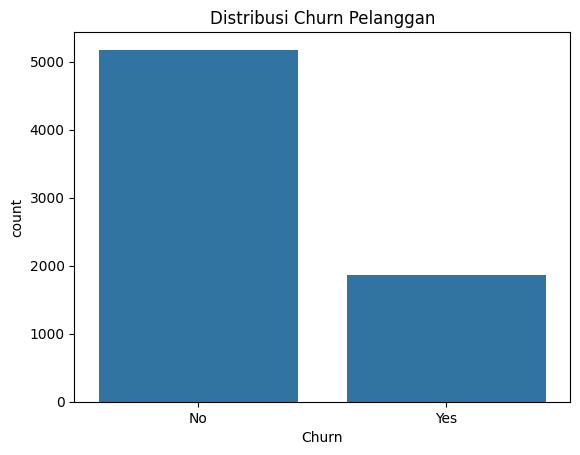

In [6]:
sns.countplot(x="Churn", data=df)
plt.title("Distribusi Churn Pelanggan")
plt.show()

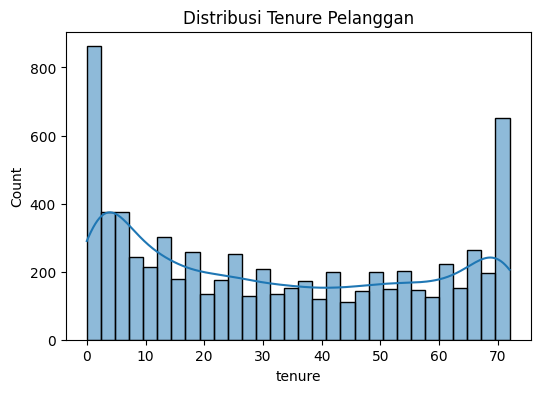

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribusi Tenure Pelanggan")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
df = df.drop_duplicates()

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

In [10]:
categorical_cols = df.select_dtypes(include=["object"]).columns

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [11]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [12]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

X.shape, y.shape

((7032, 20), (7032,))

In [13]:
import os
import pandas as pd

# Pastikan folder data ada
os.makedirs("data", exist_ok=True)

# Gabungkan fitur dan label
preprocessed_df = pd.concat([X, y], axis=1)

# SIMPAN FILE CSV (INI YANG MEMBUAT FILE)
preprocessed_df.to_csv(
    "data/preprocessed_telco_customer_churn.csv",
    index=False
)

print("Hasil preprocessing berhasil disimpan")
print("Shape data:", preprocessed_df.shape)


Hasil preprocessing berhasil disimpan
Shape data: (7032, 21)
